### Imports

In [1]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import applications
from keras.models import Model
from tensorflow.keras.models import load_model

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from typing import List, Optional
from mlxtend.plotting import plot_confusion_matrix

Using TensorFlow backend.


### Get model predictions for test set

In [2]:
def get_test_predictions(model, test_data_dir):
    img_width, img_height = 224, 224
    epochs = 40
    batch_size = 16
    
    # Create a test generator for prediction
    test_datagen = ImageDataGenerator(rescale=1./255)
    
    test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

    # Get the predictions from the model using the generator
    predictions = model.predict_generator(test_generator, steps = test_generator.samples/test_generator.batch_size, verbose=1)
    predicted_classes = np.argmax(predictions,axis=1)
    
    return predicted_classes, predictions, test_generator

### Get evaluation metrics

In [4]:
def evaluation(predicted_classes, predictions, test_generator, test_data_dir): 
    
    # Get the filenames 
    fnames = test_generator.filenames

    # Get the ground truth 
    ground_truth = test_generator.classes

    # Get class labels
    label2index = test_generator.class_indices

    # Get mapping from index to class labels
    index2label = dict((v,k) for k,v in label2index.items())
    
    # Get ordered list of class labels
    ordered_class_labels = [index2label[i] for i in range(len(index2label.keys()))]
        
    # Get confusion matrix
    cm = confusion_matrix(ground_truth, predicted_classes)

    # Display confusion matrix
    fig, ax = plot_confusion_matrix(conf_mat = cm, class_names = ordered_class_labels, figsize=(8, 8))
    ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 16)
    ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 16)
    ax.set_xlabel('Predicted Label', fontsize = 16)
    ax.set_ylabel('True Label', fontsize = 16)
    ax.set_ylim(len(cm)-0.5, -0.5)
    sns.set(font_scale=1.5)
    plt.show()
    
    # Display classification report
    print('Classification Report')
    print(classification_report(ground_truth, predicted_classes, target_names = ordered_class_labels))

    # Display number of errors
    errors = np.where(predicted_classes != ground_truth)[0]
    print("No of errors = {}/{}".format(len(errors), test_generator.samples))
    

### Evaluate VGG16 Transfer learned model

Found 312 images belonging to 4 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
20/19 [==============================] - 23s 1s/step


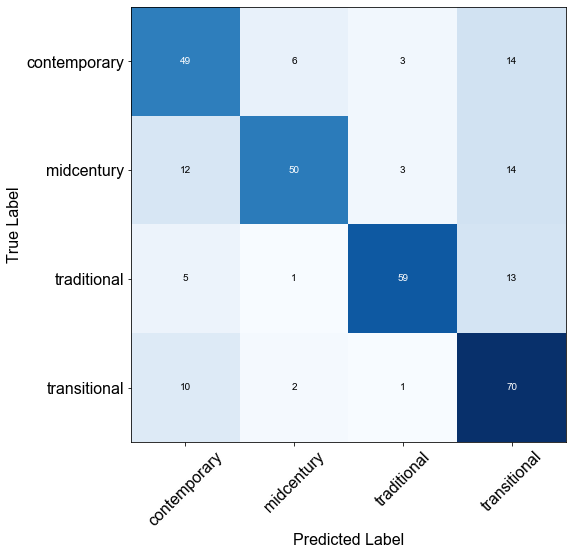

Classification Report
              precision    recall  f1-score   support

contemporary       0.64      0.68      0.66        72
  midcentury       0.85      0.63      0.72        79
 traditional       0.89      0.76      0.82        78
transitional       0.63      0.84      0.72        83

    accuracy                           0.73       312
   macro avg       0.75      0.73      0.73       312
weighted avg       0.75      0.73      0.73       312

No of errors = 84/312


In [5]:
model = load_model('model.h5')
test_data_dir = '../data/split_images/test'

predicted_classes, predictions, test_generator = get_test_predictions(model, test_data_dir)

evaluation(predicted_classes, predictions, test_generator, test_data_dir)